# Intro to satellite data  I

In this notebook we take a quick look at a 5 minutes of satellite data acquired from the MODIS instrument on the  Aqua polar orbiting satellite. Aqua flies in the [A-train]( <http://atrain.nasa.gov), which is  formation of satellites that orbit separated by a minute or so.  The granule covers the period from 20:15 to 20:20 UCT on May 15, 2016 (Julian day 136) while Aqua flew over Ft. McMurray, Alberta.  I downloaded the granule from the [Laadsweb NASA site]( https://ladsweb.nascom.nasa.gov/data/search.html) and converted it from HDF4 to HDF5 format (more on [this](https://www.hdfgroup.org/h5h4-diff.html) later).  The structure of HDF5 files can be explored with the [HDFViewer tool](https://www.hdfgroup.org/products/java/release/download.html) (install version 2.13 from that link).  The gory details are in the [Modis Users Guide](http://clouds.eos.ubc.ca/~phil/courses/atsc301/downloads/modis_users_guide.pdf).

First, download the file from our course website:

In [1]:
from e582utils.data_read import download
import h5py
filename = 'MYD021KM.A2016136.2015.006.2016138123353.h5'
download(filename)


MYD021KM.A2016136.2015.006.2016138123353.h5 already exists
and is 155338872 bytes
will not overwrite



Here is the corresponding red,green,blue color composite for the granule.

In [2]:
from IPython.display import Image
Image(url='http://clouds.eos.ubc.ca/~phil/courses/atsc301/downloads/aqua_136_2015.jpg',width=600)

### now use h5py to read some of the satellite channels

In [3]:
h5_file=h5py.File(filename)

h5 files have attributes -- stored as a dictionary

In [4]:
print(list(h5_file.attrs.keys()))

['HDFEOSVersion_GLOSDS', 'StructMetadata.0_GLOSDS', 'HDFEOS_FractionalOffset_10*nscans_MODIS_SWATH_Type_L1B_GLOSDS', 'HDFEOS_FractionalOffset_Max_EV_frames_MODIS_SWATH_Type_L1B_GLOSDS', 'CoreMetadata.0_GLOSDS', 'ArchiveMetadata.0_GLOSDS', 'Number of Scans_GLOSDS', 'Number of Day mode scans_GLOSDS', 'Number of Night mode scans_GLOSDS', 'Incomplete Scans_GLOSDS', 'Max Earth View Frames_GLOSDS', '%Valid EV Observations_GLOSDS', '%Saturated EV Observations_GLOSDS', '% L1A EV All Scan Data are Missing_GLOSDS', '% L1A EV RSB DN Not in Day Mode_GLOSDS', '% L1A EV DN Missing Within Scan_GLOSDS', '% Dead Detector EV Data_GLOSDS', '% Dead Subframe EV Data_GLOSDS', '% Sector Rotation EV Data_GLOSDS', '% Saturated EV Data_GLOSDS', '% TEB EV Data With Moon in SVP_GLOSDS', '% EV Data Where Cannot Compute BG DN_GLOSDS', '% RSB EV Data With dn** Below Scale_GLOSDS', '% EV Data Where Nadir Door Closed_GLOSDS', '% EV Data Not Calibrated_GLOSDS', 'Bit QA Flags Last Value_GLOSDS', 'Bit QA Flags Change_GLO

### print two of the attributes

In [5]:
print(h5_file.attrs['Earth-Sun Distance_GLOSDS'])

1.01107


In [6]:
print(h5_file.attrs['HDFEOSVersion_GLOSDS'])

b'HDFEOS_V2.17'


h5 files have variables -- stored in a dictionary.
The fields are aranged in a hierarchy of groups similar to a set of nested folders

Here is what HDFViewer reports for the structure of the "EV_1KM_Emissive"  dataset, which stands for "Earth View, 1 km pixel resolution, thermal emission channels".  It is showing a 3 dimensional array of integers of shape (16,2030,1354).  These are radiometer counts in 16 different wavelength channels for the 2030 x 1354 pixel granule.

In [7]:
Image('screenshots/HDF_file_structure.png')

**Read the radiance data from MODIS_SWATH_Type_L1B/Data Fields/EV_1KM_Emissive**

Note the correspondence between the keys and the fields you see in HDFView:

Here are the top level groups:

In [8]:
print(list(h5_file.keys()))

['Band_1KM_Emissive', 'Band_1KM_RefSB', 'Band_250M', 'Band_500M', 'Change in relative responses of thermal detectors', 'DC Restore Change for Reflective 1km Bands', 'DC Restore Change for Reflective 250m Bands', 'DC Restore Change for Reflective 500m Bands', 'DC Restore Change for Thermal Bands', 'HDF4_DIMGROUP', 'Level 1B Swath Metadata', 'Level 1B Swath Metadata_t', 'MODIS_SWATH_Type_L1B', 'Noise in Thermal Detectors']


and the 'MODIS_SWATH_Type_L1B' group contains 3 subgroups:

In [9]:
print(list(h5_file['MODIS_SWATH_Type_L1B'].keys()))

['Data Fields', 'Geolocation Fields', 'Swath Attributes']


and the 'Data Fields' subgroup contains 27 more groups:

In [10]:
print(list(h5_file['MODIS_SWATH_Type_L1B/Data Fields'].keys()))

['Band_1KM_Emissive', 'Band_1KM_Emissive_t', 'Band_1KM_RefSB', 'Band_1KM_RefSB_t', 'Band_250M', 'Band_250M_t', 'Band_500M', 'Band_500M_t', 'EV_1KM_Emissive', 'EV_1KM_Emissive_Uncert_Indexes', 'EV_1KM_RefSB', 'EV_1KM_RefSB_Uncert_Indexes', 'EV_250_Aggr1km_RefSB', 'EV_250_Aggr1km_RefSB_Samples_Used', 'EV_250_Aggr1km_RefSB_Uncert_Indexes', 'EV_500_Aggr1km_RefSB', 'EV_500_Aggr1km_RefSB_Samples_Used', 'EV_500_Aggr1km_RefSB_Uncert_Indexes', 'EV_Band26', 'EV_Band26_Uncert_Indexes', 'Height', 'Range', 'SensorAzimuth', 'SensorZenith', 'SolarAzimuth', 'SolarZenith', 'gflags']


Print out the 16 channel numbers stored in Band_1KM_Emissive data array.  The [...] means "read everything".  The 16 thermal channels are channels 20-36.  Their wavelength ranges and common uses are listed 
[here](https://modis.gsfc.nasa.gov/about/specifications.php)

In [11]:
print(h5_file['MODIS_SWATH_Type_L1B/Data Fields/Band_1KM_Emissive'][...])

[(20.0,) (21.0,) (22.0,) (23.0,) (24.0,) (25.0,) (27.0,) (28.0,) (29.0,)
 (30.0,) (31.0,) (32.0,) (33.0,) (34.0,) (35.0,) (36.0,)]


**note that channel 31, which covers the wavelength range 10.78-11.28 $\mu m$  occurs at index value 10 (remember python counts from 0)**

In [12]:
index31=10

**the data are stored as unsigned (i.e. only positive values), 2 byte (16 bit) integers which can hold values from 0 to $2^{16}$ - 1 = 65,535.
The ">u2" notation below for the datatype (dtype) says that the data is unsigned, 2 byte, with the most significant
byte stored first ("big endian", which is the same way we write numbers)**  

(Although the 2 byte words contain 16 bits, only  12 bits are significant).

(h5py let's you specify the group names one at a time, instead of using '/' to separate them.  This is convenient if you are storing your field name in a variable, for example.)

In [13]:
my_name = 'EV_1KM_Emissive'
chan31=h5_file['MODIS_SWATH_Type_L1B']['Data Fields'][my_name][index31,:,:]
print(chan31.shape,chan31.dtype)

(2040, 1354) >u2


**Print the first 3 rows and columns**

In [14]:
chan31[:3,:3]

array([[8254, 8097, 8405],
       [8384, 8081, 8351],
       [8577, 8230, 8302]], dtype=uint16)

** we need to apply a
scale and offset to convert counts to radiance, with units of $(W\,m^{-2}\,\mu m^{-1}\,sr^{-1}$).  More about the
sr units later**

$Data = (RawData - offset) \times scale$

this information is included in the attributes of each variable.

(see page 36 of the [Modis Users Guide](http://clouds.eos.ubc.ca/~phil/courses/atsc301/downloads/modis_users_guide.pdf))

**here is the scale for all 16 channels**

In [15]:
scale=h5_file['MODIS_SWATH_Type_L1B']['Data Fields']['EV_1KM_Emissive'].attrs['radiance_scales'][...]
print(scale)

[  6.93075344e-05   3.46690253e-03   7.62657510e-05   8.99075312e-05
   3.15561410e-05   5.63982067e-05   1.17831965e-04   1.92449734e-04
   5.57084859e-04   4.06323437e-04   6.50807226e-04   5.71001263e-04
   2.62337097e-04   2.00872819e-04   1.76763206e-04   1.18594922e-04]


**and here is the offset for 16 channels**

In [16]:
offset=h5_file['MODIS_SWATH_Type_L1B']['Data Fields']['EV_1KM_Emissive'].attrs['radiance_offsets'][...]
print(offset)

[ 2467.2644043   2480.60058594  2478.17651367  2402.46850586  1077.44482422
  1560.33337402  2724.21826172  2317.48828125  2610.01538086  1560.33325195
  2035.93322754  2119.08447266  2500.59936523  2499.09350586  2500.52050781
  2495.89111328]


**note that as the satellite ages and wears out, these calibration coefficients change**

In [17]:
chan31_calibrated =(chan31 - offset[index31])*scale[index31]

In [18]:
%matplotlib inline

**histogram the raw counts -- note that hist doesn't know how to handle 2-dim arrays, so flatten to 1-d**

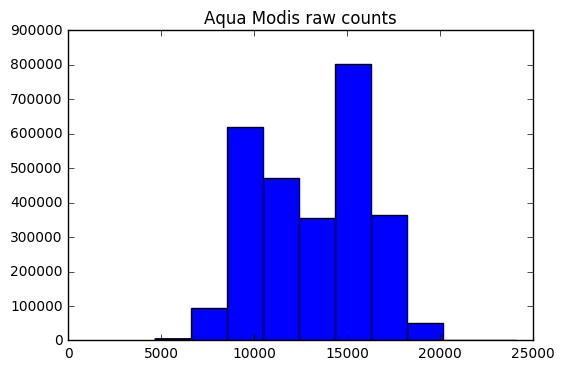

In [19]:
import matplotlib.pyplot as plt
out=plt.hist(chan31.flatten())
#
# get the current axis to add title with gca()
#
ax = plt.gca()
_=ax.set(title='Aqua Modis raw counts')

**histogram the calibrated radiances and show that they lie between
0-10 $W\,m^{-2}\,\mu m^{-1}\,sr^{-1}$ **

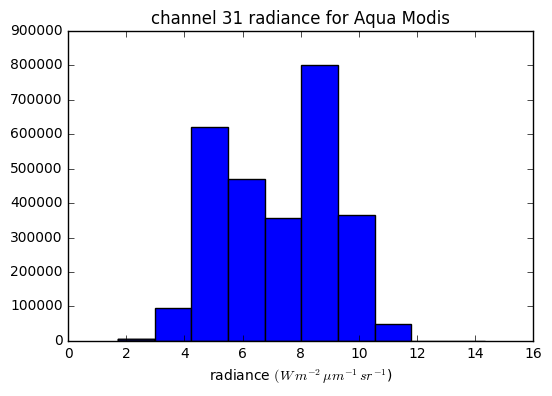

In [20]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,1)
ax.hist(chan31_calibrated.flatten())
_=ax.set(xlabel='radiance $(W\,m^{-2}\,\mu m^{-1}\,sr^{-1}$)',
      title='channel 31 radiance for Aqua Modis')

** Next Read MODIS_SWATH_Type_L1B/Geolocation Fields/Longitude**

note that the longitude and latitude arrays are (406,271) while the actual
data are (2030,1354).   These lat/lon arrays show only every fifth row and column to
save space.  The full lat/lon arrays are stored in a separate file.

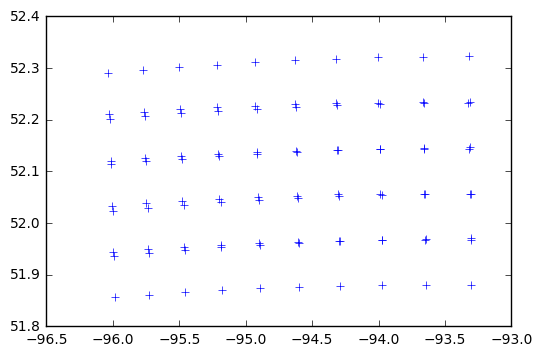

In [21]:
lon_data=h5_file['MODIS_SWATH_Type_L1B']['Geolocation Fields']['Longitude'][...]
lat_data=h5_file['MODIS_SWATH_Type_L1B']['Geolocation Fields']['Latitude'][...]
_=plt.plot(lon_data[:10,:10],lat_data[:10,:10],'b+')

**Note two things:  1) the pixels overlap and 2) they don't line up on lines of constant longitude and latitude**

**The pixels are also not all the same size -- this distortion is called the [bowtie effect](http://eoweb.dlr.de:8080/short_guide/D-MODIS.html)**

**Next -- plotting image data**